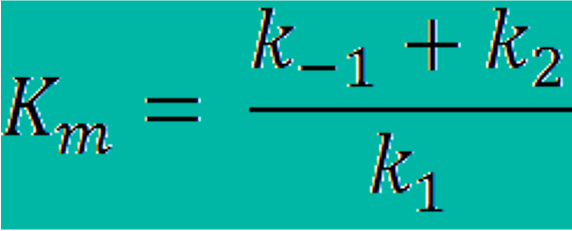

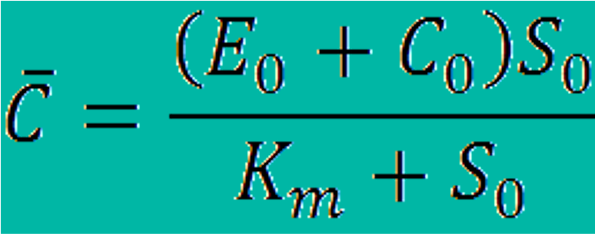

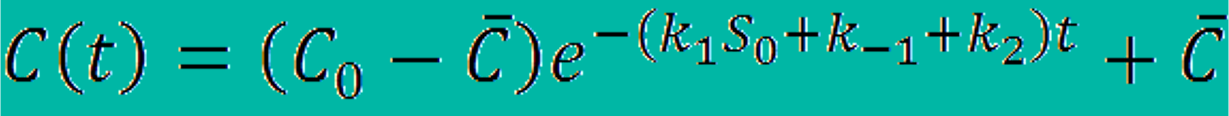

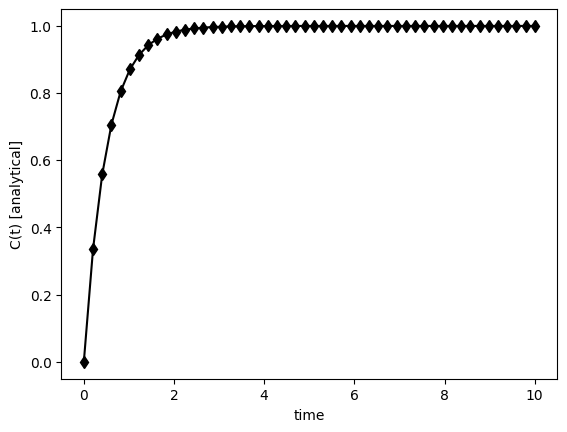

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import linspace, array
from math import exp

def analytical_solution_for_C(t,y0,k_1,k_n1,k_2): #calculate value of C for time, init conc., and rate constants
    E0 = y0[0] # the enzyme
    S0 = y0[1] # the substrate
    C0 = y0[2] # the enzyme-substrate complex
    P0 = y0[3] # ... and the product

    K_m = (k_n1 + k_2)/k_1

    Cbar = (E0+C0)*S0/(K_m + S0)

    # if t is a vector, we can calculate C for each unit of time
    # calculate the value of C for each time
    C = [((C0-Cbar)*exp(-1*(k_1*S0+k_n1+k_2)*t[i])+Cbar) for i in range(len(t))]

    return C

# Define the kinetic constants (what are the units?)
k_1 = 0.002; k_n1 = 0.001; k_2 = 0.001
params = (k_1, k_n1, k_2)

# y0 is the initial vector [E_0 S_0 C_0 P_0]
# substrate excess condition: set the substrate concentration much higher
# than the enzyme concentration
y0 = [1, 1000, 0, 0]

# define the time points at which to evaluate the analytical solution
times = linspace(0.,10.,)
# get values of the analytical solution at each time
Cs = analytical_solution_for_C(times, y0, k_1, k_n1, k_2)
# plot the solution with black diamonds and a line between
plt.figure(1)
plt.plot(times, Cs, 'kd-')
plt.xlabel('time'); plt.ylabel('C(t) [analytical]')
#plt.savefig('lec24fig1.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False) #allows the program to continue after showing figure

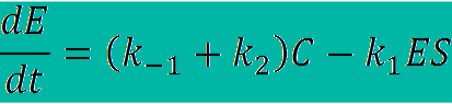

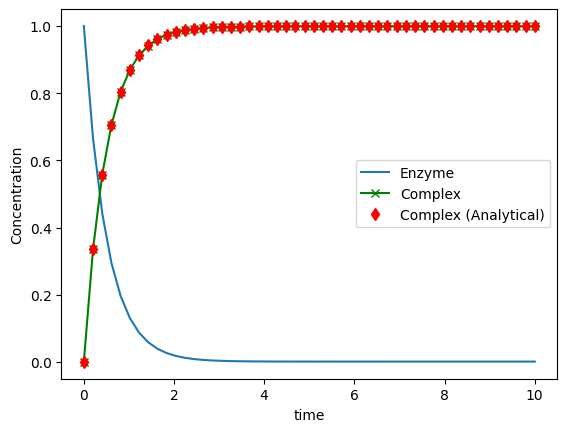

0.4995004995004996


In [2]:
# Declare the model
def myModel(y, t, k_1, k_n1, k_2):
    # y is a vector containing the current state of the system
    # this means it holds a value for
    E = y[0] # the enzyme
    S = y[1] # the substrate
    C = y[2] # the enzyme-substrate complex
    P = y[3] # ... and the product

    # these equations are determined from the reaction
    dy0 = (k_n1 + k_2)*C - k_1*E*S
    dy1 = k_n1*C - k_1*E*S
    dy2 = k_1*E*S - (k_n1 + k_2)*C
    dy3 = k_2*C;
    return [dy0, dy1, dy2, dy3]

# now find the numerical solution using "odeint" for the same initial vector
y = odeint(myModel, y0, times, params);
plt.figure(2)
plt.plot(times, y[:,0], label='Enzyme')
#plt.plot(times, y[:,1], label='Substrate')
plt.plot(times, y[:,2], 'gx-', label='Complex') #mark green xs
#plt.plot(times, y[:,3], label='Product')

# Let's compare against the analytical solution
plt.plot(times, Cs, 'rd', label='Complex (Analytical)'); #red diamonds
plt.xlabel('time'); plt.ylabel('Concentration'); plt.legend()
#plt.savefig('lec24fig2.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False) #allows the program to continue after showing figure

timescale = 1/(k_1*y0[1] + k_n1 + k_2) # 1/k
print(timescale)

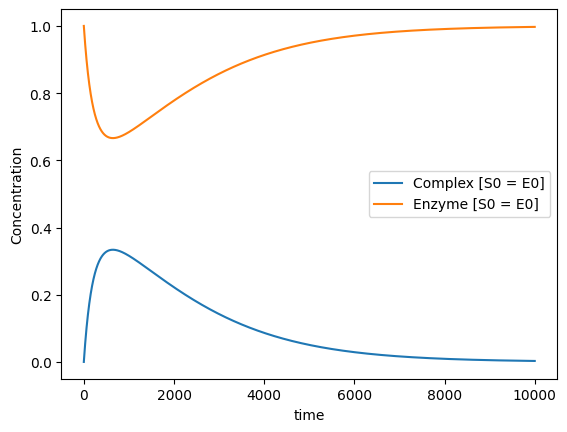

In [3]:
# now see what happens in the full model when S is low
plt.figure(3)
# redo for longer times since when S is lower reaction takes longer
times = linspace(0.,10000.,10001)
# use lower substrate concentration
y0 = [1, 1, 0, 0]
y = odeint(myModel, y0, times, params);
plt.plot(times, y[:,2], label='Complex [S0 = E0]')
plt.plot(times, y[:,0], label='Enzyme [S0 = E0]')
plt.xlabel('time'); plt.ylabel('Concentration'); plt.legend()
#plt.savefig('lec24fig3.png', bbox_inches='tight') #save the plot to a file
plt.show()


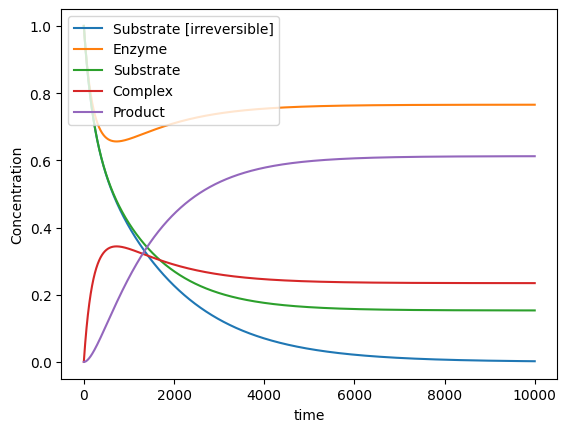

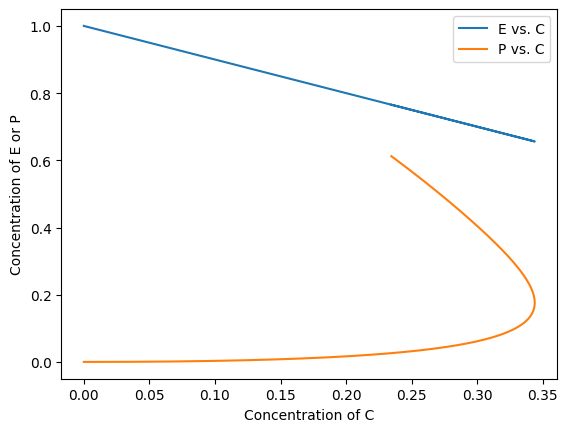

In [4]:
# allow reversal of product to substrate
def myModelReversible(y, t, k_1, k_n1, k_2, k_n2):
    # y is a vector containing the current state of the system
    # this means it holds a value for
    E = y[0] # the enzyme
    S = y[1] # the substrate
    C = y[2] # the enzyme-substrate complex
    P = y[3] # ... and the product

    # these equations are determined from the reaction
    dy0 = (k_n1 + k_2)*C - k_1*E*S - k_n2*E*P # can use up E by forming product
    dy1 = k_n1*C - k_1*E*S
    dy2 = k_1*E*S + k_n2*E*P - (k_n1 + k_2)*C
    dy3 = k_2*C - k_n2*E*P;
    return [dy0, dy1, dy2, dy3]

k_n2 = 0.0005
params2 = (k_1, k_n1, k_2, k_n2)

# Show substrate kinetics from the previous model model
plt.plot(times, y[:,1], label='Substrate [irreversible]')

# simulate reversible catalysis/product feedback (note different function)
y2 = odeint(myModelReversible, y0, times, params2);
plt.plot(times, y2[:,0], label='Enzyme')
plt.plot(times, y2[:,1], label='Substrate')
plt.plot(times, y2[:,2], label='Complex')
plt.plot(times, y2[:,3], label='Product')
plt.xlabel('time'); plt.ylabel('Concentration'); plt.legend()
#plt.savefig('lec24fig4.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)

plt.figure(2)
plt.plot(y2[:,2],y2[:,0],label='E vs. C')
plt.plot(y2[:,2],y2[:,3],label='P vs. C')
plt.xlabel('Concentration of C'); plt.ylabel('Concentration of E or P');
plt.legend()
#plt.savefig('lec24fig5.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)


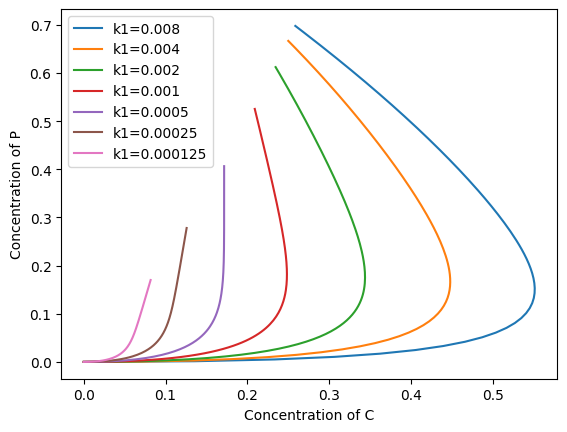

In [5]:
# now generate phase plane for different k1 values
# but increase the number of time steps since the rates are changing
times = linspace(0.,10000.,501)
plt.figure(3)
k_1 = 0.008
for divisor in range(1,8):
    params2 = (k_1, k_n1, k_2, k_n2)
    y = odeint(myModelReversible, y0, times, params2);
    plt.plot(y[:,2],y[:,3],label="k1="+str(k_1))
    k_1 = k_1/2

plt.xlabel('Concentration of C'); plt.ylabel('Concentration of P');
plt.legend(loc=2)
#plt.savefig('lec24fig6.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False)



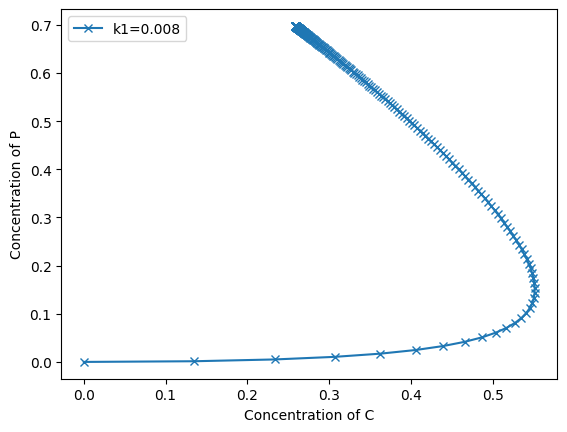

In [6]:
#now put marks to show the progression of time
plt.figure(4)
k_1 = 0.008
params2 = (k_1, k_n1, k_2, k_n2)
y = odeint(myModelReversible, y0, times, params2);
plt.plot(y[:,2],y[:,3], 'x-', label="k1="+str(k_1))
plt.xlabel('Concentration of C'); plt.ylabel('Concentration of P');
plt.legend(loc=2)
#plt.savefig('lec24fig8.png', bbox_inches='tight') #save the plot to a file
plt.show()
